# EuroSAT Project - Phase 2 & 3
Model Building, Training, Evaluation & Saving

In [ ]:
# EuroSAT Land Use Classification - Phase 2 & 3: Model Building, Training & Evaluation

In [ ]:
## Step 1: Load Processed Data

In [1]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from PIL import Image

In [3]:
import os
import numpy as np
from PIL import Image

def load_data(data_dir, img_size=(64, 64)):
    images, labels = [], []
    label_map = {}

    for idx, cat in enumerate(sorted(os.listdir(data_dir))):
        label_map[idx] = cat
        for file in os.listdir(os.path.join(data_dir, cat)):
            img_path = os.path.join(data_dir, cat, file)
            img = Image.open(img_path).resize(img_size)
            images.append(np.array(img))
            labels.append(idx)

    return np.array(images), np.array(labels), label_map

In [5]:
data_dir = "EuroSAT/2750"
X, y, label_map = load_data(data_dir)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Label map:", label_map)

X shape: (27000, 64, 64, 3)
y shape: (27000,)
Label map: {0: 'AnnualCrop', 1: 'Forest', 2: 'HerbaceousVegetation', 3: 'Highway', 4: 'Industrial', 5: 'Pasture', 6: 'PermanentCrop', 7: 'Residential', 8: 'River', 9: 'SeaLake'}


In [7]:
data_path = "EuroSAT/2750"
X, y, label_map = load_data(data_path)
X = X / 255.0  # Normalize

In [9]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
## Step 2: Build CNN Model with TensorFlow/Keras

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [17]:
num_classes = len(np.unique(y_train))

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(64, 64, 3)),  
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,626,442 (6.20 MB)

 Trainable params: 1,626,442 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
## Step 3: Train the Model

In [23]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 144s 255ms/step - accuracy: 0.3132 - loss: 1.8310 - val_accuracy: 0.5699 - val_loss: 1.1886
Epoch 2/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 140s 258ms/step - accuracy: 0.5825 - loss: 1.1935 - val_accuracy: 0.6847 - val_loss: 0.8805
Epoch 3/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 135s 245ms/step - accuracy: 0.6623 - loss: 0.9631 - val_accuracy: 0.7463 - val_loss: 0.7004
Epoch 4/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 131s 242ms/step - accuracy: 0.7026 - loss: 0.8345 - val_accuracy: 0.7602 - val_loss: 0.6701
Epoch 5/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 130s 241ms/step - accuracy: 0.7357 - loss: 0.7613 - val_accuracy: 0.7787 - val_loss: 0.6408
Epoch 6/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 134s 247ms/step - accuracy: 0.7421 - loss: 0.7261 - val_accuracy: 0.7678 - val_loss: 0.6522
Epoch 7/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 141s 246ms/step - accuracy: 0.7546 - loss: 0.7150 - val_accuracy: 0.7824 - val_loss: 0.6116
Epoch 8/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 130s 241ms/step - accuracy: 0.7777 -

In [ ]:
## Step 4: Evaluate the Model

In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

169/169 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - accuracy: 0.7938 - loss: 0.5644
Test Accuracy: 0.79


In [ ]:
## Step 5: Plot Training History

In [27]:
import matplotlib.pyplot as plt

In [29]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

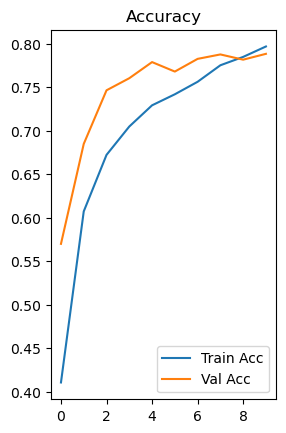

In [31]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

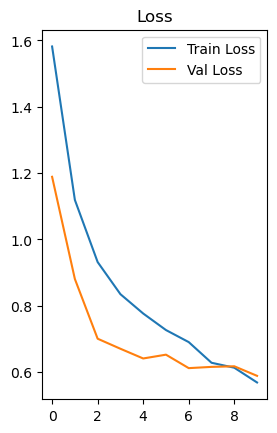

In [33]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

In [35]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
## Step 6: Save the Model

In [39]:
model.save("eurosat_cnn_model.keras")
print("Model saved as eurosat_cnn_model.keras")

Model saved as eurosat_cnn_model.keras
